In [14]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(12, 6),"font.size":20,"axes.titlesize":20,"axes.labelsize":20},style="darkgrid")

Is there any connection with the crime and food inspection failures? May be ! For now, I am focusing on the burgalaries only. The burglary data is the chicago's crime data filtered for burgalaries only (in the same time window i.e. first 3 months of 2019).

In [2]:
burglary = pd.read_json('../data/raw/burglary.json', convert_dates=['date'])
burglary.head()

,arrest,beat,block,case_number,community_area,date,description,district,domestic,fbi_code,...,location_description,location_state,location_zip,longitude,primary_type,updated_on,ward,x_coordinate,y_coordinate,year
0,False,835,026XX W 79TH ST,JB147595,70,2017-03-28 14:00:00,UNLAWFUL ENTRY,8,False,5,...,OTHER,None,None,NaN,BURGLARY,2018-02-11T15:57:41.000,18,NaN,NaN,2017
1,False,511,102XX S EBERHART AVE,JB148941,49,2017-12-16 14:30:00,FORCIBLE ENTRY,5,False,5,...,VACANT LOT/LAND,None,None,NaN,BURGLARY,2018-02-12T15:49:14.000,9,NaN,NaN,2017
10,False,833,074XX S PULASKI RD,JB160512,70,2017-03-10 10:00:00,UNLAWFUL ENTRY,8,False,5,...,OTHER,None,None,NaN,BURGLARY,2018-02-22T15:58:56.000,18,NaN,NaN,2017
100,True,1413,021XX N ST LOUIS AVE,JC119083,22,2018-05-01 00:01:00,UNLAWFUL ENTRY,14,False,5,...,RESIDENCE,None,None,NaN,BURGLARY,2019-05-13T16:06:00.000,35,NaN,NaN,2018
1000,False,121,001XX S RIVERSIDE PLZ,JC316756,28,2019-06-21 23:00:00,FORCIBLE ENTRY,1,False,5,...,RESTAURANT,,,-87.638676,BURGLARY,2019-06-30T15:56:27.000,42,1173421.0,1899683.0,2019


In [3]:
shape = burglary.shape
print(" There are %d rows and %d columns in the data" % (shape[0], shape[1]))
print(burglary.info())

 There are 29133 rows and 26 columns in the data
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29133 entries, 0 to 9999
Data columns (total 26 columns):
arrest                  29133 non-null bool
beat                    29133 non-null int64
block                   29133 non-null object
case_number             29133 non-null object
community_area          29133 non-null int64
date                    29133 non-null datetime64[ns]
description             29133 non-null object
district                29133 non-null int64
domestic                29133 non-null bool
fbi_code                29133 non-null int64
id                      29133 non-null int64
iucr                    29133 non-null int64
latitude                28998 non-null float64
location                28998 non-null object
location_address        28998 non-null object
location_city           28998 non-null object
location_description    29132 non-null object
location_state          28998 non-null object
location_zip    

Let's check if there are any null values in the data. 

In [4]:
burglary.isna().sum()

arrest                    0
beat                      0
block                     0
case_number               0
community_area            0
date                      0
description               0
district                  0
domestic                  0
fbi_code                  0
id                        0
iucr                      0
latitude                135
location                135
location_address        135
location_city           135
location_description      1
location_state          135
location_zip            135
longitude               135
primary_type              0
updated_on                0
ward                      0
x_coordinate            135
y_coordinate            135
year                      0
dtype: int64

In [5]:
burglary['latitude'].fillna(burglary['latitude'].mode()[0], inplace=True)
burglary['longitude'].fillna(burglary['longitude'].mode()[0], inplace=True)

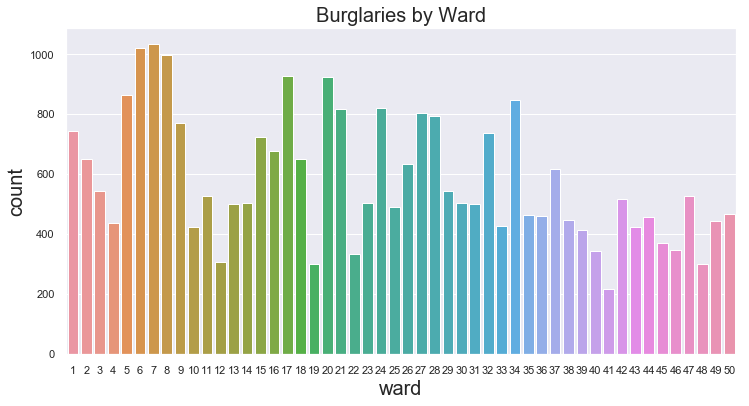

In [6]:
ax = sns.countplot(x="ward", data=burglary)
plt.title("Burglaries by Ward")
plt.show()

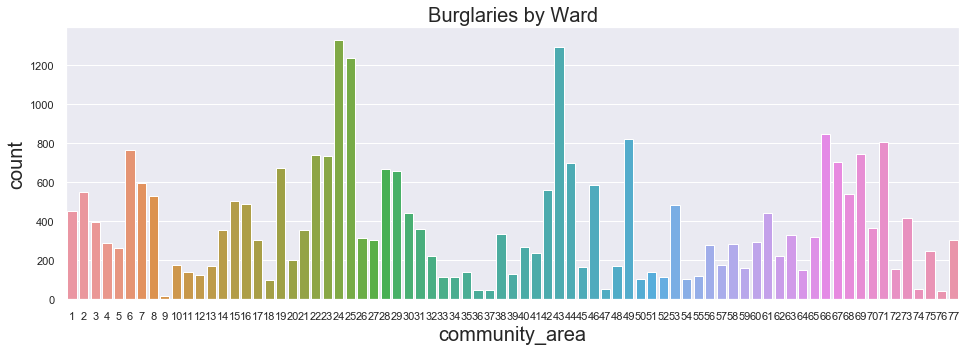

In [22]:
plt.rcParams['figure.figsize'] = 16, 5
ax = sns.countplot(x="community_area", data=burglary)
plt.title("Burglaries by Ward")
plt.show()

Burglaries HeatMap

In [9]:
import gmaps
APIKEY= os.getenv('GMAPAPIKEY')
gmaps.configure(api_key=APIKEY)

def make_heatmap(locations, weights=None):
    fig = gmaps.figure()
    heatmap_layer = gmaps.heatmap_layer(locations)
    #heatmap_layer.max_intensity = 100
    heatmap_layer.point_radius = 8
    fig.add_layer(heatmap_layer)
    return fig
    

In [10]:
locations = zip(burglary['latitude'], burglary['longitude'])
fig = make_heatmap(locations)
fig

Figure(layout=FigureLayout(height='420px'))

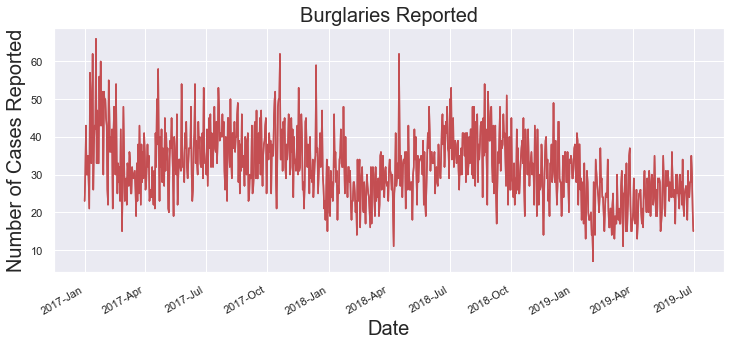

In [15]:
burglary_per_day = pd.DataFrame()
burglary_per_day = burglary[['date', 'case_number']]
burglary_per_day = burglary_per_day.set_index(
    pd.to_datetime(burglary_per_day['date']))
burglary_per_day = burglary_per_day.resample('D').count()
plt.rcParams['figure.figsize'] = 12, 5
fig, ax = plt.subplots()
fig.autofmt_xdate()
#
#ax.xaxis.set_major_locator(mdates.MonthLocator())
#ax.xaxis.set_minor_locator(mdates.DayLocator())
monthFmt = mdates.DateFormatter('%Y-%b')
ax.xaxis.set_major_formatter(monthFmt)

plt.plot(burglary_per_day.index, burglary_per_day, 'r-')
plt.xlabel('Date')
plt.ylabel('Number of Cases Reported')
plt.title('Burglaries Reported')
plt.show()

In [17]:
burglary['event_date'] = burglary['date']
burglary = burglary.set_index('event_date')
burglary.sort_values(by='date', inplace=True)
burglary.head()

,arrest,beat,block,case_number,community_area,date,description,district,domestic,fbi_code,...,location_description,location_state,location_zip,longitude,primary_type,updated_on,ward,x_coordinate,y_coordinate,year
event_date,,,,,,,,,,,,,,,,,,,,,
2017-01-01 02:42:00,False,324,073XX S STONY ISLAND AVE,JA100143,43,2017-01-01 02:42:00,ATTEMPT FORCIBLE ENTRY,3,False,5,...,RESTAURANT,,,-87.586199,BURGLARY,2017-02-14T15:49:42.000,5,1188089.0,1856440.0,2017
2017-01-01 02:59:00,True,1713,048XX N KEDZIE AVE,JA100159,14,2017-01-01 02:59:00,FORCIBLE ENTRY,17,False,5,...,RESTAURANT,,,-87.708494,BURGLARY,2017-02-14T15:49:42.000,33,1154172.0,1931913.0,2017
2017-01-01 03:41:00,False,732,073XX S HALSTED ST,JA100253,68,2017-01-01 03:41:00,FORCIBLE ENTRY,7,False,5,...,COMMERCIAL / BUSINESS OFFICE,,,-87.644304,BURGLARY,2018-02-09T15:44:29.000,17,1172237.0,1856217.0,2017
2017-01-01 04:55:00,False,935,007XX W GARFIELD BLVD,JA100406,61,2017-01-01 04:55:00,FORCIBLE ENTRY,9,False,5,...,SMALL RETAIL STORE,,,-87.643884,BURGLARY,2018-02-09T15:44:29.000,3,1172254.0,1868396.0,2017
2017-01-01 05:00:00,False,331,067XX S CHAPPEL AVE,JA373286,43,2017-01-01 05:00:00,UNLAWFUL ENTRY,3,False,5,...,RESIDENCE,,,-87.575255,BURGLARY,2018-02-10T15:50:01.000,5,1191037.0,1860745.0,2017


In [19]:
burglary.to_csv('../data/processed/burglary_data_processed.csv')